In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

In [7]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 1.0634 - categorical cross entropy: 1.0634 - mean squared error: 0.0677 - accuracy: 0.6735 - auc: 0.6532 - prc: 0.2049

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


29/29 [==============================] - 144s 3s/step - loss: 1.0634 - categorical cross entropy: 1.0634 - mean squared error: 0.0677 - accuracy: 0.6735 - auc: 0.6532 - prc: 0.2049 - val_loss: 1.1850 - val_categorical cross entropy: 1.1850 - val_mean squared error: 0.0782 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 2/200
29/29 [==============================] - 16s 555ms/step - loss: 0.9780 - categorical cross entropy: 0.9780 - mean squared error: 0.0632 - accuracy: 0.6676 - auc: 0.7643 - prc: 0.2551 - val_loss: 7.4654 - val_categorical cross entropy: 7.4654 - val_mean squared error: 0.0918 - val_accuracy: 0.6750 - val_auc: 0.5231 - val_prc: 0.1570 - lr: 0.0010
Epoch 3/200
29/29 [==============================] - 14s 494ms/step - loss: 0.8996 - categorical cross entropy: 0.8996 - mean squared error: 0.0589 - accuracy: 0.6843 - auc: 0.8083 - prc: 0.2606 - val_loss: 41.5049 - val_categorical cross entropy: 41.5049 - val_mean squared error: 0.0942 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_5\assets


29/29 [==============================] - 73s 3s/step - loss: 0.7852 - categorical cross entropy: 0.7852 - mean squared error: 0.0526 - accuracy: 0.7306 - auc: 0.8453 - prc: 0.3018 - val_loss: 1.0357 - val_categorical cross entropy: 1.0357 - val_mean squared error: 0.0611 - val_accuracy: 0.6885 - val_auc: 0.8113 - val_prc: 0.2937 - lr: 0.0010
Epoch 6/200
29/29 [==============================] - 14s 483ms/step - loss: 0.8558 - categorical cross entropy: 0.8558 - mean squared error: 0.0574 - accuracy: 0.6886 - auc: 0.8293 - prc: 0.3080 - val_loss: 8.2681 - val_categorical cross entropy: 8.2681 - val_mean squared error: 0.1734 - val_accuracy: 0.2445 - val_auc: 0.6443 - val_prc: 0.1962 - lr: 0.0010
Epoch 7/200
29/29 [==============================] - 14s 504ms/step - loss: 0.8121 - categorical cross entropy: 0.8121 - mean squared error: 0.0558 - accuracy: 0.6897 - auc: 0.8654 - prc: 0.3325 - val_loss: 1.2052 - val_categorical cross entropy: 1.2052 - val_mean squared error: 0.0780 - val_accu

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_9\assets


29/29 [==============================] - 72s 3s/step - loss: 0.7826 - categorical cross entropy: 0.7826 - mean squared error: 0.0536 - accuracy: 0.7171 - auc: 0.8718 - prc: 0.3776 - val_loss: 0.9362 - val_categorical cross entropy: 0.9362 - val_mean squared error: 0.0604 - val_accuracy: 0.6830 - val_auc: 0.8364 - val_prc: 0.3663 - lr: 0.0010
Epoch 10/200
29/29 [==============================] - ETA: 0s - loss: 0.7568 - categorical cross entropy: 0.7568 - mean squared error: 0.0525 - accuracy: 0.7155 - auc: 0.8722 - prc: 0.3999

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_10\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_10\assets


29/29 [==============================] - 71s 3s/step - loss: 0.7568 - categorical cross entropy: 0.7568 - mean squared error: 0.0525 - accuracy: 0.7155 - auc: 0.8722 - prc: 0.3999 - val_loss: 0.9184 - val_categorical cross entropy: 0.9184 - val_mean squared error: 0.0588 - val_accuracy: 0.7035 - val_auc: 0.8210 - val_prc: 0.3849 - lr: 0.0010
Epoch 11/200
29/29 [==============================] - 12s 405ms/step - loss: 0.7217 - categorical cross entropy: 0.7217 - mean squared error: 0.0493 - accuracy: 0.7468 - auc: 0.8724 - prc: 0.3698 - val_loss: 4.9806 - val_categorical cross entropy: 4.9806 - val_mean squared error: 0.1678 - val_accuracy: 0.2475 - val_auc: 0.6351 - val_prc: 0.1921 - lr: 0.0010
Epoch 12/200
29/29 [==============================] - 13s 446ms/step - loss: 0.7225 - categorical cross entropy: 0.7225 - mean squared error: 0.0490 - accuracy: 0.7495 - auc: 0.8767 - prc: 0.3724 - val_loss: 1.0865 - val_categorical cross entropy: 1.0865 - val_mean squared error: 0.0659 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_13\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_13\assets


29/29 [==============================] - 78s 3s/step - loss: 0.7583 - categorical cross entropy: 0.7583 - mean squared error: 0.0521 - accuracy: 0.7297 - auc: 0.8398 - prc: 0.3662 - val_loss: 0.8789 - val_categorical cross entropy: 0.8789 - val_mean squared error: 0.0584 - val_accuracy: 0.6890 - val_auc: 0.8048 - val_prc: 0.3301 - lr: 0.0010
Epoch 14/200
29/29 [==============================] - 12s 401ms/step - loss: 0.7847 - categorical cross entropy: 0.7847 - mean squared error: 0.0540 - accuracy: 0.7133 - auc: 0.8736 - prc: 0.3961 - val_loss: 1.4820 - val_categorical cross entropy: 1.4820 - val_mean squared error: 0.0575 - val_accuracy: 0.7335 - val_auc: 0.8040 - val_prc: 0.4104 - lr: 0.0010
Epoch 15/200
29/29 [==============================] - 12s 408ms/step - loss: 0.7320 - categorical cross entropy: 0.7320 - mean squared error: 0.0508 - accuracy: 0.7381 - auc: 0.8850 - prc: 0.4398 - val_loss: 1.0639 - val_categorical cross entropy: 1.0639 - val_mean squared error: 0.0635 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_16\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_16\assets


29/29 [==============================] - 73s 3s/step - loss: 0.7088 - categorical cross entropy: 0.7088 - mean squared error: 0.0496 - accuracy: 0.7452 - auc: 0.8987 - prc: 0.4642 - val_loss: 0.7603 - val_categorical cross entropy: 0.7603 - val_mean squared error: 0.0507 - val_accuracy: 0.7435 - val_auc: 0.8748 - val_prc: 0.4717 - lr: 0.0010
Epoch 17/200
29/29 [==============================] - 12s 409ms/step - loss: 0.6925 - categorical cross entropy: 0.6925 - mean squared error: 0.0482 - accuracy: 0.7457 - auc: 0.8975 - prc: 0.4571 - val_loss: 0.8518 - val_categorical cross entropy: 0.8518 - val_mean squared error: 0.0545 - val_accuracy: 0.7180 - val_auc: 0.8753 - val_prc: 0.4667 - lr: 0.0010
Epoch 18/200
29/29 [==============================] - 12s 407ms/step - loss: 0.6986 - categorical cross entropy: 0.6986 - mean squared error: 0.0482 - accuracy: 0.7559 - auc: 0.8903 - prc: 0.4792 - val_loss: 0.8693 - val_categorical cross entropy: 0.8693 - val_mean squared error: 0.0555 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_20\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_20\assets


29/29 [==============================] - 86s 3s/step - loss: 0.6786 - categorical cross entropy: 0.6786 - mean squared error: 0.0475 - accuracy: 0.7554 - auc: 0.8879 - prc: 0.4787 - val_loss: 0.7427 - val_categorical cross entropy: 0.7427 - val_mean squared error: 0.0510 - val_accuracy: 0.7395 - val_auc: 0.8823 - val_prc: 0.5158 - lr: 0.0010
Epoch 21/200
29/29 [==============================] - 12s 428ms/step - loss: 0.6796 - categorical cross entropy: 0.6796 - mean squared error: 0.0473 - accuracy: 0.7635 - auc: 0.8969 - prc: 0.4838 - val_loss: 0.7940 - val_categorical cross entropy: 0.7940 - val_mean squared error: 0.0514 - val_accuracy: 0.7360 - val_auc: 0.8872 - val_prc: 0.5191 - lr: 0.0010
Epoch 22/200
29/29 [==============================] - 12s 408ms/step - loss: 0.6742 - categorical cross entropy: 0.6742 - mean squared error: 0.0478 - accuracy: 0.7527 - auc: 0.8945 - prc: 0.4995 - val_loss: 1.0346 - val_categorical cross entropy: 1.0346 - val_mean squared error: 0.0617 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_26\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_26\assets


29/29 [==============================] - 77s 3s/step - loss: 0.6665 - categorical cross entropy: 0.6665 - mean squared error: 0.0471 - accuracy: 0.7575 - auc: 0.9122 - prc: 0.5344 - val_loss: 0.7104 - val_categorical cross entropy: 0.7104 - val_mean squared error: 0.0466 - val_accuracy: 0.7670 - val_auc: 0.8991 - val_prc: 0.5412 - lr: 0.0010
Epoch 27/200
29/29 [==============================] - 12s 406ms/step - loss: 0.7207 - categorical cross entropy: 0.7207 - mean squared error: 0.0486 - accuracy: 0.7570 - auc: 0.8893 - prc: 0.5073 - val_loss: 0.9442 - val_categorical cross entropy: 0.9442 - val_mean squared error: 0.0581 - val_accuracy: 0.7130 - val_auc: 0.8748 - val_prc: 0.4668 - lr: 0.0010
Epoch 28/200
29/29 [==============================] - 12s 408ms/step - loss: 0.6877 - categorical cross entropy: 0.6877 - mean squared error: 0.0483 - accuracy: 0.7532 - auc: 0.9009 - prc: 0.5161 - val_loss: 0.8364 - val_categorical cross entropy: 0.8364 - val_mean squared error: 0.0519 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_30\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_30\assets


29/29 [==============================] - 75s 3s/step - loss: 0.6484 - categorical cross entropy: 0.6484 - mean squared error: 0.0442 - accuracy: 0.7796 - auc: 0.9071 - prc: 0.5509 - val_loss: 0.6882 - val_categorical cross entropy: 0.6882 - val_mean squared error: 0.0459 - val_accuracy: 0.7665 - val_auc: 0.8954 - val_prc: 0.5573 - lr: 0.0010
Epoch 31/200
29/29 [==============================] - 13s 433ms/step - loss: 0.6696 - categorical cross entropy: 0.6696 - mean squared error: 0.0474 - accuracy: 0.7635 - auc: 0.9139 - prc: 0.5355 - val_loss: 0.6925 - val_categorical cross entropy: 0.6925 - val_mean squared error: 0.0478 - val_accuracy: 0.7600 - val_auc: 0.9045 - val_prc: 0.5424 - lr: 0.0010
Epoch 32/200
29/29 [==============================] - 12s 401ms/step - loss: 0.6498 - categorical cross entropy: 0.6498 - mean squared error: 0.0466 - accuracy: 0.7593 - auc: 0.9220 - prc: 0.5522 - val_loss: 0.7420 - val_categorical cross entropy: 0.7420 - val_mean squared error: 0.0522 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_34\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_34\assets


29/29 [==============================] - 79s 3s/step - loss: 0.6456 - categorical cross entropy: 0.6456 - mean squared error: 0.0459 - accuracy: 0.7656 - auc: 0.9190 - prc: 0.5569 - val_loss: 0.6180 - val_categorical cross entropy: 0.6180 - val_mean squared error: 0.0425 - val_accuracy: 0.7825 - val_auc: 0.9178 - val_prc: 0.5971 - lr: 0.0010
Epoch 35/200
29/29 [==============================] - 12s 408ms/step - loss: 0.6578 - categorical cross entropy: 0.6578 - mean squared error: 0.0463 - accuracy: 0.7575 - auc: 0.9235 - prc: 0.6005 - val_loss: 0.8218 - val_categorical cross entropy: 0.8218 - val_mean squared error: 0.0559 - val_accuracy: 0.7245 - val_auc: 0.8848 - val_prc: 0.5135 - lr: 0.0010
Epoch 36/200
29/29 [==============================] - 12s 407ms/step - loss: 0.6261 - categorical cross entropy: 0.6261 - mean squared error: 0.0455 - accuracy: 0.7694 - auc: 0.9261 - prc: 0.5701 - val_loss: 0.6737 - val_categorical cross entropy: 0.6737 - val_mean squared error: 0.0471 - val_ac

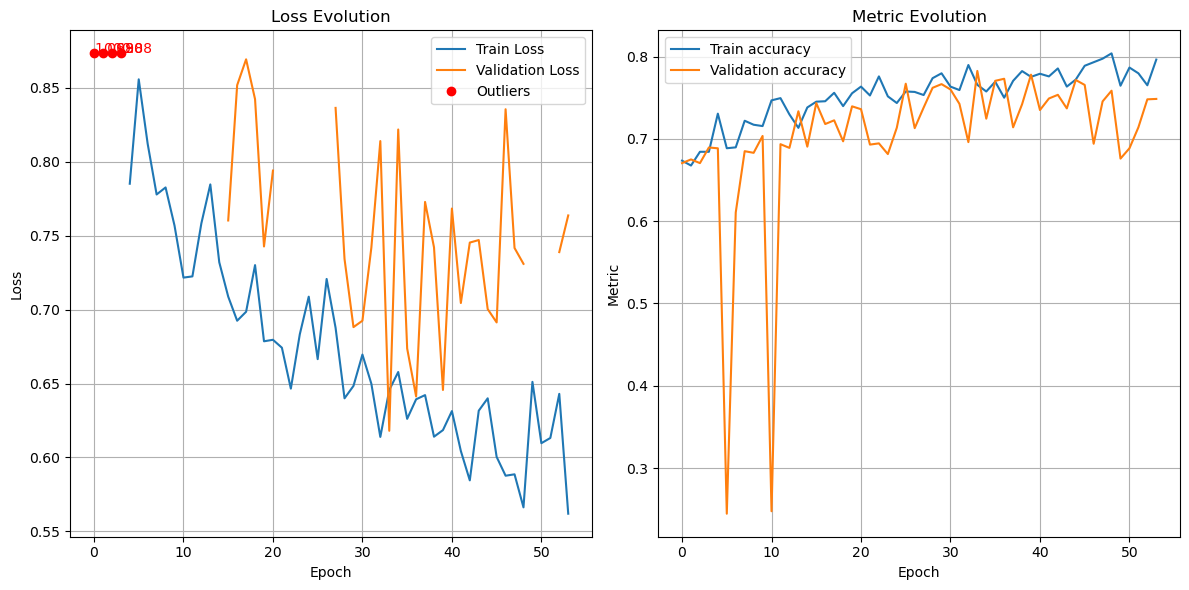

In [8]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_model_with_attention(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20,
    epochs=200)